In [1]:
#Detecting Credit Card Fraud with Machine Learning and Deep Learning


In [2]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [5]:
#data is the result of PCA so , its column are like V1, V2 and all and our label is CLass which is  1 for fraud and 0 for not fraud
df = pd.read_csv('/content/sample_data/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [27]:
df.shape

(200126, 31)

In [30]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [31]:
df = df.dropna()
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0.0    199740
1.0       385
Name: Class, dtype: int64

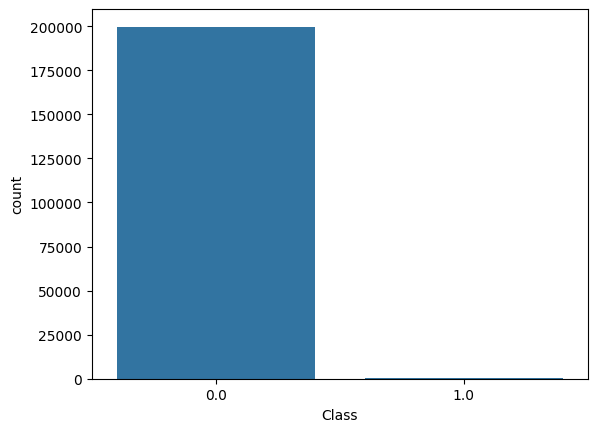

In [32]:
sns.countplot(x=df['Class'])
df["Class"].value_counts()

In [11]:
# The data is highly imbalanced as it has negligible amount of fraud transaction so, for better result and prediction
#we need to balance the dataset for training

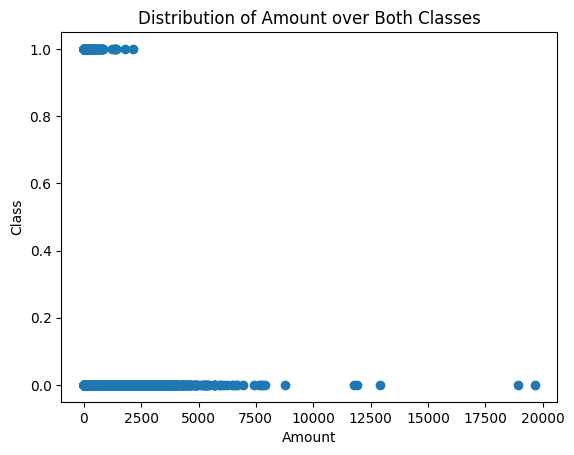

In [33]:
# Adding titles to the plots and axes
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

# Plotting the Amount column vs. Class Column
plt.scatter(df["Amount"],df["Class"])

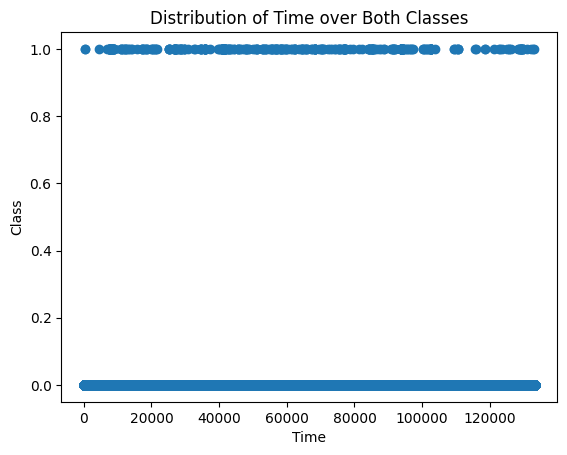

In [34]:
# Adding titles to the plots and axes
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

# Plotting the Time column vs. Class Column
plt.scatter(df["Time"],df["Class"])

In [14]:
# From scatter plot it is clear that in the above plot, the fraud transaction are having low transaction amount than the non farud transactions,
#but in terms of time the fraud and non fraud transaction seems similar


<Axes: >

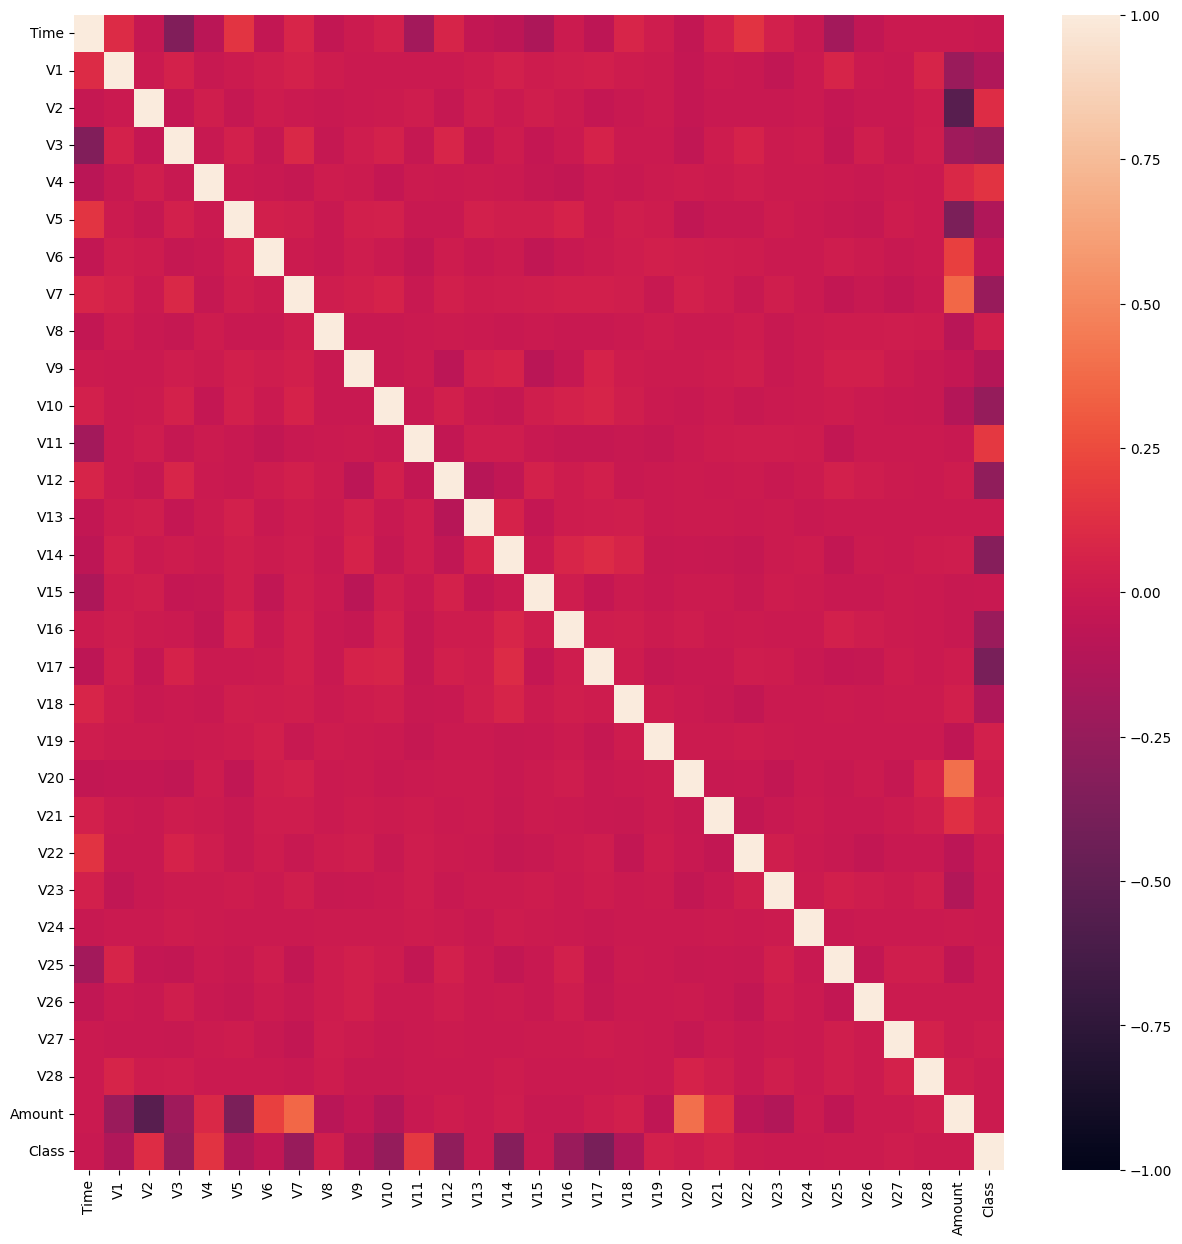

In [35]:
#correalation plot
df_corr = df.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr, vmin=-1, vmax=1)

In [36]:
#splitting the datasets
X = df.drop(["Class","Time"],axis=1).values
y = df["Class"].values


X_train_Before, X_test, y_train_Before, y_test = train_test_split(
    X, y, test_size = 0.3,
    random_state = 42)


In [37]:
#scaling the dateset
from sklearn.preprocessing import StandardScaler
X_train_Before = pd.DataFrame(X_train_Before)
X_test = pd.DataFrame(X_test)
scaler = StandardScaler()
for i in X_train_Before:
    scaler = StandardScaler()
    X_train_Before[i] = scaler.fit_transform(X_train_Before[i].values.reshape(-1,1))
    X_test[i] = scaler.transform(X_test[i].values.reshape(-1,1))
X_train_Before = X_train_Before.values
X_test = X_test.values

In [39]:
#balance the dataset uisng Borderline_SMOTE

borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 42)
X_train, y_train = borderlineSMOTE.fit_resample(X_train_Before,y_train_Before)

In [48]:
y_train = pd.DataFrame(y_train)
y_train.value_counts()


0.0    139815
1.0    139815
dtype: int64

In [49]:
y_train.values

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [52]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators = 15,random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

<ipython-input-52-25b1eaf67808>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Precision: 0.93
Recall: 0.8230088495575221
F1 Score: 0.8732394366197184


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[59918,     7],
       [   20,    93]])

Great! Our model had a high precision and recall, meaning that it did not select as many false positives (precision) or false negatives (recall) as it did true positives! Because of this, the F1 score was high as well

In [54]:

#Logistic Regression Classifier

logReg = LogisticRegression()

logReg.fit(X_train, y_train)

log_y_pred = logReg.predict(X_test)

log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)

print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1 Score:", log_f1)

confusion_matrix(y_test, log_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.14410480349344978
Recall: 0.8761061946902655
F1 Score: 0.24749999999999997


array([[59337,   588],
       [   14,    99]])

Well…in this case, while recall was high (model selected more true positives than false negatives), the precision was really low, which means that the model selected more false positives than true positives. Hence, the F1 score decreased.

In comparing these two models, it is important to evaluate the metrics by which we compare them. Our logistic regression model had a higher recall (by approximately 5%), while the random forest classifier had a higher precision, (by approximately 78%). Hence, in terms of F1 score, which is a harmonic mean of both precision and recall, the random forest model performed better

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Dense(64,input_dim=29,activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, beta_2=0.999)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model.fit(X_train, y_train, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
8739/8739 [==============================] - 25s 3ms/step - loss: 0.0965 - precision: 0.9666 - recall: 0.9639 - val_loss: 0.0199 - val_precision: 0.2988 - val_recall: 0.8938
Epoch 2/5
8739/8739 [==============================] - 23s 3ms/step - loss: 0.0150 - precision: 0.9967 - recall: 0.9979 - val_loss: 0.0120 - val_precision: 0.5440 - val_recall: 0.8761
Epoch 3/5
8739/8739 [==============================] - 24s 3ms/step - loss: 0.0082 - precision: 0.9983 - recall: 0.9995 - val_loss: 0.0103 - val_precision: 0.6000 - val_recall: 0.8761
Epoch 4/5
8739/8739 [==============================] - 25s 3ms/step - loss: 0.0060 - precision: 0.9989 - recall: 0.9997 - val_loss: 0.0092 - val_precision: 0.6923 - val_recall: 0.8761
Epoch 5/5
8739/8739 [==============================] - 25s 3ms/step - loss: 0.0049 - precision: 0.9992 - recall: 0.9997 - val_loss: 0.0085 - val_precision: 0.7557 - val_recall: 0.8761


In [58]:
# Get the loss and validation loss history
history = model.history
print(history.history.keys())

dict_keys(['loss', 'precision', 'recall', 'val_loss', 'val_precision', 'val_recall'])


In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

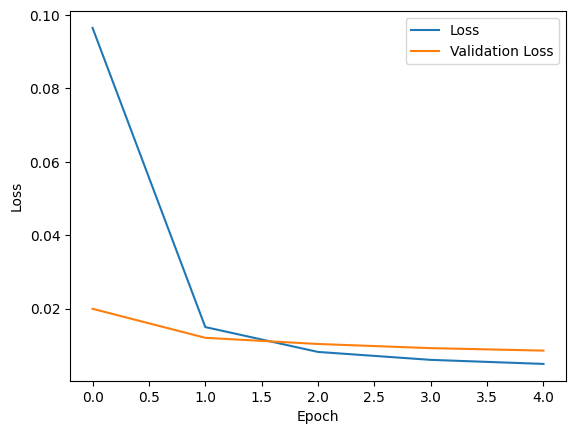

In [63]:
# Plot the loss and validation loss
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
# Get the accuracy and validation accuracy history
history = model.history
accuracy = history.history['precision']
val_accuracy = history.history['val_precision']

# Print the final training and validation accuracy
print('Final training accuracy:', accuracy[-1])
print('Final validation accuracy:', val_accuracy[-1])

Final training accuracy: 0.9992279410362244
Final validation accuracy: 0.7557252049446106


In [ ]:
#hence the accuracy is good enough